# Figure 2: Student and faculty speakers at MSTP Symposium

This notebook uses Python3 and imports all necessary dependencies as it is run. 

**Input**: Takes in the raw datafile entitled "speakers_raw_data.csv" in the `data` directory.  
**Output**: Saves a PDF of figure 2 to `figures` directory. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams

In [3]:
# import raw data into a Pandas dataframe 
DF = pd.read_csv('../data/speakers_raw_data.csv') # this path may need to be updated depending on where you running this script from and where you have the raw datafile saved
DF.rename(columns={'AY':'academic year'}, inplace=True)

# uncomment this to print the dataframe
# DF

In [4]:
# determine the average + SD student, faculty, and keynote speakers 

# students
avg_fstudent = DF['female_student'].mean()
std_fstudent = DF['female_student'].std()
avg_mstudent = DF['male_student'].mean()
std_mstudent = DF['male_student'].std()

# faculty
avg_ffaculty = DF['female_faculty'].mean()
std_ffaculty = DF['female_faculty'].std()
avg_mfaculty = DF['male_faculty'].mean()
std_mfaculty = DF['male_faculty'].std()

# keynotes
avg_fkeynote = DF['female_keynote'].mean()
std_fkeynote = DF['female_keynote'].std()
avg_mkeynote = DF['male_keynote'].mean()
std_mkeynote = DF['male_keynote'].std()

# print below
print("Average female student speakers (std): ", round(avg_fstudent, 3), "(", round(std_fstudent, 3),")")
print("Average male student speakers (std): ", round(avg_mstudent, 3), "(", round(std_mstudent, 3),")")
print("\n")
print("Average female faculty speakers (std): ", round(avg_ffaculty, 3), "(", round(std_ffaculty, 3),")")
print("Average male faculty speakers (std): ", round(avg_mfaculty, 3), "(", round(std_mfaculty, 3),")")
print("\n")
print("Average female keynote speakers (std): ", round(avg_fkeynote, 3), "(", round(std_fkeynote, 3),")")
print("Average male keynote speakers (std): ", round(avg_mkeynote, 3), "(", round(std_mkeynote, 3),")")


Average female student speakers (std):  0.064 ( 0.065 )
Average male student speakers (std):  0.058 ( 0.038 )


Average female faculty speakers (std):  0.273 ( 0.55 )
Average male faculty speakers (std):  1.091 ( 1.875 )


Average female keynote speakers (std):  0.182 ( 0.395 )
Average male keynote speakers (std):  0.727 ( 0.456 )


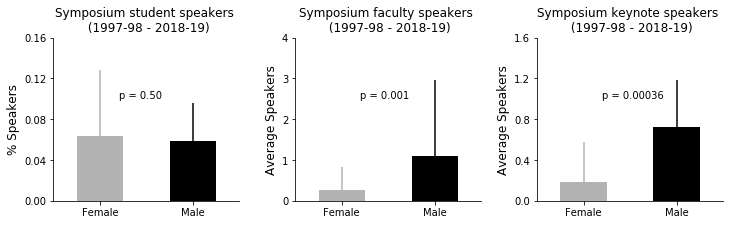

In [5]:
# generate new dataframes from the above averages and std devs 
data = [['fstudent', avg_fstudent, std_fstudent], ['mstudent', avg_mstudent, std_mstudent], ['ffaculty', avg_ffaculty, std_ffaculty], ['mfaculty', avg_mfaculty, std_mfaculty], ['fkeynote', avg_fkeynote, std_fkeynote], ['mkeynote', avg_mkeynote, std_mkeynote]]
fig = pd.DataFrame(data, columns = ['category', 'average', 'std_dev'])

student = fig.loc[[0,1]]
student['category'] = student['category'].replace({'fstudent' : 'Female', 'mstudent' : 'Male'}, regex=True)

faculty = fig.loc[[2,3]]
faculty['category'] = faculty['category'].replace({'ffaculty' : 'Female', 'mfaculty' : 'Male'}, regex=True)

keynote = fig.loc[[4,5]]
keynote['category'] = keynote['category'].replace({'fkeynote' : 'Female', 'mkeynote' : 'Male'}, regex=True)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,3))
f.subplots_adjust(wspace=0.3)

error1 = [std_fstudent, std_mstudent]
colors1 = ['#B3B3B3','#000000']
ecolors1 = ['#B3B3B3','#000000']
ax1 = student.plot.bar(x='category', y='average', yerr=error1, ecolor=ecolors1, ax=ax1, color=colors1, title='Symposium student speakers \n (1997-98 - 2018-19)', legend=False)
ax1.set_ylim([0, 0.15])
ax1.set_ylabel('% Speakers', fontsize=12)
ax1.set_xlabel('')
ax1.tick_params(labelrotation=0)
ax1.set_yticks(ax1.get_yticks()[::2])

error2 = [std_ffaculty, std_mfaculty]
colors2 = ['#B3B3B3','#000000']
ecolors2 = ['#B3B3B3','#000000']
ax2 = faculty.plot.bar(x='category', y='average', yerr=error2, ecolor=ecolors2, ax=ax2, color=colors2, title='Symposium faculty speakers \n (1997-98 - 2018-19)', legend=False)
ax2.set_ylim([0, 4])
ax2.set_ylabel('Average Speakers', fontsize=12)
ax2.set_xlabel('')
ax2.tick_params(labelrotation=0)
ax2.set_yticks(ax2.get_yticks()[::2])

error3 = [std_fkeynote, std_mkeynote]
colors3 = ['#B3B3B3','#000000']
ecolors3 = ['#B3B3B3','#000000']
ax3 = keynote.plot.bar(x='category', y='average', yerr=error3, ecolor=ecolors3, ax=ax3, color=colors3, title='Symposium keynote speakers \n (1997-98 - 2018-19)', legend=False)
ax3.set_ylim([0, 1.6])
ax3.set_ylabel('Average Speakers', fontsize=12)
ax3.set_xlabel('')
ax3.tick_params(labelrotation=0)
ax3.set_yticks(ax3.get_yticks()[::2])

plt.text(-5,1,'p = 0.50') # updated as of Dec, 2019 
plt.text(-2.4,1,'p = 0.001')
plt.text(0.2,1,'p = 0.00036')

# Save plot as a PDF
plt.savefig('../figures/figure2_speakers-by-gender.pdf', dpi=300, transparent=True, bbox_inches='tight')
